In [2]:
# 해상도 높이기, 전처리
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import os

import gangan


451 392
<class 'tensorflow.python.framework.ops.EagerTensor'> (1, 196, 225, 3)


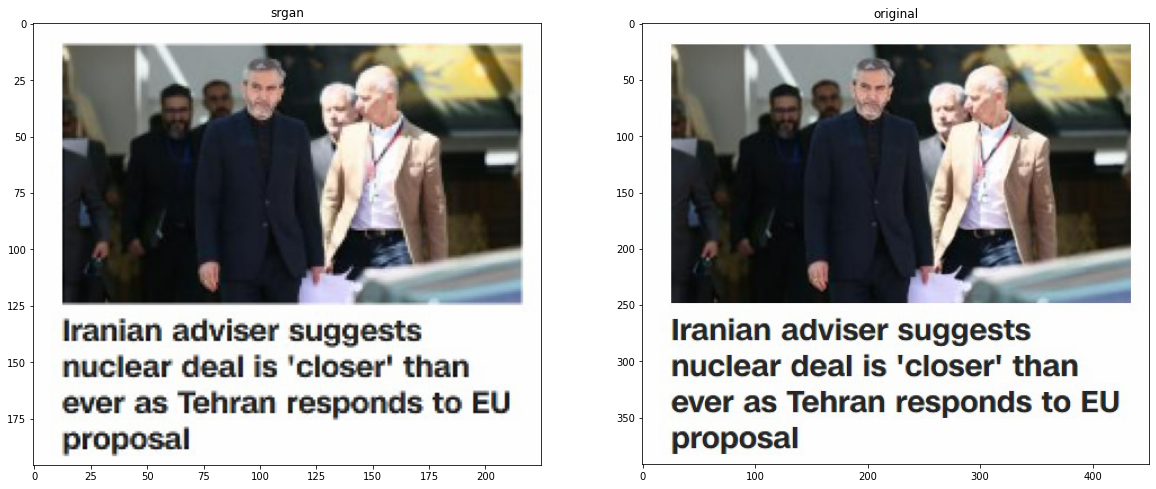

In [3]:
hr = Image.open('./imgs/news1.jpg')
srgan_img = gangan.apply_srgan(hr)


# 원본 이미지랑 비교
plt.figure(figsize=(20, 24))
plt.subplot(1,2,1)
plt.imshow(srgan_img)
plt.title('srgan')
plt.subplot(1,2,2)
plt.imshow(hr)
plt.title('original')
plt.show()
# 모르겠따.. 안 쓰는 게 나은 것 같다..

In [4]:
# 사진에서 해상도 높임.

In [15]:
# 글자 인식. 영어 숫자 ~! 등의 문자가 아닌 것은 제거 후 하나의 리스트에 저장. 각각 좌표 기억

## 테서랙트

from PIL import Image
from pytesseract import pytesseract

# Defining paths to tesseract.exe
# and the image we would be using
path_to_tesseract = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
image_path = r"bird.jpg"

# Opening the image & storing it in an image object
#img = Image.open(image_path)

# Providing the tesseract executable
# location to pytesseract library
pytesseract.tesseract_cmd = path_to_tesseract

# Passing the image object to image_to_string() function
# This function will extract the text from the image
text = pytesseract.image_to_string(srgan_img)

# Displaying the extracted text
print(text[:-1]) # 맨 뒤에 애ㅔㄴ터는 뺀 듯


Iranian adviser suggests
nuclear deal is 'closer' than
ever as Tehran responds to EU
proposal


In [6]:
## 이미지 받으면 컨투어스 검출해서 반환
def cntHra(bgr): # np array를 받는다
    small = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY) # BGR->GRAY
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)) # 요소 탐색 모양  타원으로 결정
    grad = cv2.morphologyEx(small, cv2.MORPH_GRADIENT, kernel) # 이미지 침식
    _, bw = cv2.threshold(grad, 0.0, 255.0, cv2.THRESH_BINARY | cv2.THRESH_OTSU) # 임계값 찾음. (윤곽, 이미지)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 1)) #  사각형 커널 
    connected = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel) # 구멍 메우는 용도
    contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    return contours, hierarchy, bw

In [7]:
# 번역 함수
import googletrans
def translate_result(string, lang='ko'):  # 기본적으로 한글로 번역

    translator = googletrans.Translator()

    result = translator.translate(string, dest=lang) # result는 번역 객체
    return result.text # 번역된 결과 text만 반환

In [8]:
## 영어 숫자 !~등만 허용
import re
# result = re.match("[a-zA-Z0-9_]+", "1 2 Fizz 4 Buzz +__Fizz 7 8")
#text='Iranian adviser, me 14.3 ** !!!~~~go%'
# phoneNums = re.findall('[a-zA-Z0-9.,!~]+', text) # 영어 숫자만 허용
# print(text)
# print(phoneNums)

# print(result.group())

def cleanSentence(st):
    re.findall('[a-zA-Z0-9.,!~]+', st)
    return st

In [9]:
## 한글 그리는 함수
from PIL import Image, ImageFont, ImageDraw

def textImage(img, string, x, y, fontsize, fontcolor=(0,0,0)):
    
    pil_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # CV2를 RGB파일로
    pil_image = Image.fromarray(pil_image) # PIL이미지로 변환

    # 그리기 준비, 폰트 설정
    fontpath = './font/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf'
    font = ImageFont.truetype(fontpath, fontsize) # 폰트 종류, 크기 지정. 폰트 객체 생성
    draw = ImageDraw.Draw(pil_image) # 그리기 객체 생성

    draw.text((x, y), str(string), fontcolor, font=font) # 텍스트 그리기

    return pil_image

<class 'numpy.ndarray'>


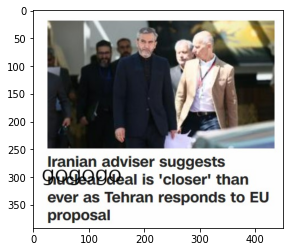

In [19]:
image = cv2.imread('./imgs/news1.jpg')
pil_img = textImage(image, 'gogogo', 15, 270, 40)
plt.imshow(pil_img)
print(type(image))

<class 'numpy.ndarray'>
검출한 글자:  
검출한 글자:  
검출한 글자:  
검출한 글자:  responds to

추가된 글자:  responds to

검출한 글자:  
검출한 글자:  
검출한 글자:  
검출한 글자:  
검출한 글자:  
검출한 글자:  Iranian adviser suggests

추가된 글자:  Iranian adviser suggests

['이란 고문 제안']
<class 'numpy.ndarray'>


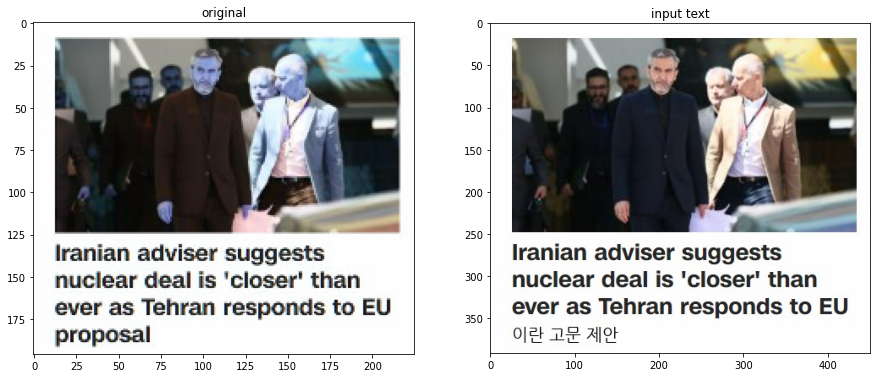

In [28]:
# 이미지를 불러오고 텍스트를 찾아서 지우고 번역한 텍스트를 삽입
tmp = np.array(Image.open('./imgs/news1.jpg'))
contours, hierarchy, bw = cntHra(tmp)
mask = np.zeros(bw.shape, dtype=np.uint8) # 기본 마스크는 bgr, 전부 0이다.

# img = srgan_img.copy()
img = cv2.imread('./imgs/news1.jpg')
print(type(img))
plt.figure(figsize=(15,20))
plt.subplot(1,2,1)
plt.imshow(tmp)
plt.title('open img')
plt.subplot(1,2,2)
plt.imshow(img)
plt.title('srgan copy')


xywh = []
text_list = []

# 찾은 글자 박스 하나씩 돌면서
for idx in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[idx]) # 박스 하나의 x, y, w, h
    mask[y:y+h, x:x+w] = 0 # 원본 이미지에서 텍스트를 발견한 부분을 마스크에서 0으로 만듦
    cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
                # mask에 contours를 그린다 (외곽선을 그림)
                # idx = 포인트 어레이 인덱스
                # 컨투어 색상은 (255,255,255)
                # 컨투어 라인 두께 : -1
    #plt.subplot(5,5, idx+1)
    #plt.imshow(mask)
    r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h) 
    # mask 내 0이 아닌 부분 검출한 후 비율을 계산해서 0.45보다 크면



    if r > 0.45 and w > 8 and h > 8: # 0.45보다 크고 박스 크기가 일정 이상이라면.        
        # 글자 검출
        txtArea = img[y:y+h, x:x+w]     
        # txt = pytesseract.image_to_string(txtArea, # 글자 있는 부분 사각형
        #                 lang='ENG',config='--psm 4 -c preserve_interword_spaces=1')
        txt = pytesseract.image_to_string(txtArea)
        
        xywh.append((x,y,w,h)) # 기억
        print('검출한 글자: ', txt)
        if txt!='':
            tmp = cleanSentence(txt)
            text_list.append(tmp)
            print('추가된 글자: ', tmp)


#for문 나와서 모든 상자의 텍스트 추출, 각 상자의 위치 기억 후

# 모은 텍스트를 하나로 합친 후 다시 분리
concat_txt = ''.join(text_list) # #은 잘 번역됨~
result = translate_result(string=txt)
separ_txt = str.split(result, '#')     
print(separ_txt)
print(type(img))

## 첫 번째 꺼 가져와서 그려보기
x, y, _, _ = xywh[0]
b,g,r = img[y, x]
cv2.drawContours(img, contours, 0, (float(b),float(g),float(r)), -1)
img = textImage(img, string=separ_txt[0], x=x, y=y, fontsize=20)

# for idx in range(len(contours)): # 이미지에 글씨 그리기
#     x, y, _, _ = xywh[idx]
#     b,g,r = img[y,x] ## 'Image' object is not subscriptable???
#     cv2.drawContours(img, contours, idx, (float(b),float(g),float(r)), -1) # 박스를 그린다. (배경 칠하기)
    
#     # 번역 결과 result를 이미지에 그리기
#     img = textImage(img, string=separ_txt[idx], x=x, y=y, fontsize=11, fontcolor=(255,255,255))


# 원본 이미지
# ori_img = cv2.imread(img_path)
ori_img = cv2.cvtColor(srgan_img, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.imshow(ori_img)
plt.title('original')

# 번역된 글자가 삽입된 이미지 출력
plt.subplot(1,2,2)
plt.imshow(img)
plt.title('input text')
# plt.imshow(mask)
plt.show()

In [ ]:
### 해결해야 할 것
- srgan의 타입, 전처리와 현재 img 비교해서 왜 글자 추출 제대로 안 되는지 원인 파악
- 글자 추출해서 한번에 번역하는 건 잘 됨
- 배경 지우고 글자 제대로 삽입하는 것만 되면 참 좋을 듯 -> 이 부분은 meme 코드 참조해서 후딱 하기


In [ ]:
# 하나의 리스트에 있는 말들을 하나로 합쳐서 번역 후 다시 분리.

In [ ]:
# 각각 기억한 좌표를 지우고 거기에 분리한 문장들을 삽입.